In [14]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [26]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [35]:
train_data_amount = 14000

x_val = x_train[:train_data_amount]
partial_x_train = x_train[train_data_amount:]

y_val = y_train[:train_data_amount]
partial_y_train = y_train[train_data_amount:]

history = model.fit(partial_x_train,
    partial_y_train,
    epochs=10,
    batch_size=512,
    validation_data=(x_val, y_val)
    )
history_dict = history.history

print(history_dict.keys())


results = model.evaluate(x_test, y_test)

print(results)


Epoch 1/10
22/22 [==============================] - 0s 21ms/step - loss: 0.0630 - accuracy: 0.9861 - val_loss: 0.2940 - val_accuracy: 0.8929
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0520 - accuracy: 0.9901 - val_loss: 0.3185 - val_accuracy: 0.8894
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0388 - accuracy: 0.9935 - val_loss: 0.3477 - val_accuracy: 0.8850
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0327 - accuracy: 0.9940 - val_loss: 0.4240 - val_accuracy: 0.8757
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0267 - accuracy: 0.9964 - val_loss: 0.4258 - val_accuracy: 0.8754
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0182 - accuracy: 0.9982 - val_loss: 0.4097 - val_accuracy: 0.8824
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 0.0170 - accuracy: 0.9984 - val_loss: 0.4577 - val_accuracy: 0.8749
Epoch 8/10
22/22 [=

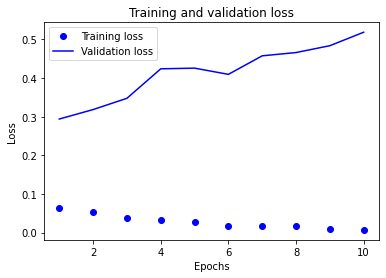

In [36]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')

# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

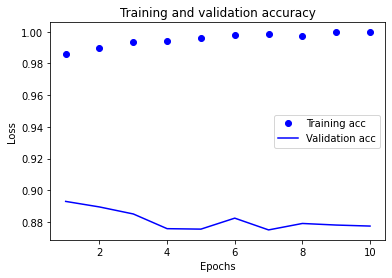

In [37]:
plt.clf()
# clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
model.predict(x_test)

array([[0.01403588],
       [1.        ],
       [0.98256123],
       ...,
       [0.00953263],
       [0.07319525],
       [0.02568552]], dtype=float32)